In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Student_marks.csv')

In [3]:
data.head()


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
data.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [5]:
data.shape

(100, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [8]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [9]:
data["number_courses"].value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

In [10]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


In [11]:
X = data.drop(['Marks'],axis=1)
y=data['Marks']

In [12]:
X

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [13]:
y

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)




GradientBoostingRegressor()

In [18]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)



In [19]:
from sklearn import metrics

In [20]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)


In [25]:
print(score1,score2)

0.9459936100591214 0.6915230838373385


In [26]:
final_data = pd.DataFrame({'Models':['LR','SV'],
             "R2_SCORE":[score1,score2]})


In [27]:
final_data

,Models,R2_SCORE
0,LR,0.945994
1,SV,0.691523


C:\Users\Sanket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

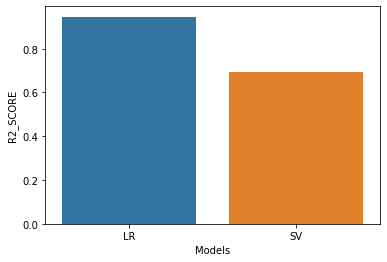

In [28]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

In [29]:
lr =LinearRegression()
lr_final = lr.fit(X,y)


In [30]:
import joblib

In [33]:
joblib.dump(rf,'model_joblib_test')

['model_joblib_test']

In [34]:
model = joblib.load('model_joblib_test')

In [38]:
model.predict([[3,4.5]])

C:\Users\Sanket\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([20.11396])